In [67]:
import random
import matplotlib.pyplot as plt
import math
import numpy as np

In [68]:
def calc_probs(p_login,p_logout):
    p_not_logout = 1 - p_logout
    p_not_login = 1 - p_login
    P=[]
    P.append([p_not_login*p_not_login, p_not_login*p_login*2, p_login*p_login])
    P.append([p_not_login*p_logout, p_not_login*p_not_logout + p_login * p_logout, p_not_logout * p_login])
    P.append([p_logout*p_logout, p_not_logout*p_logout*2, p_not_logout*p_not_logout])
    return P

In [69]:
p_login = 0.2
p_logout = 0.5

probs = calc_probs(p_login, p_logout)

P = np.array(probs)

In [70]:
e=1e-5

In [121]:
P_n = np.array(probs)
N=0

data=[[list() for j in range(P.shape[0])] for i in range(P.shape[1])]
for i in range(P.shape[1]):
    for j in range(P.shape[0]):
        data[i][j].append(P[j,i])
print(data)
while(True):
    N+=1
    temp = P_n
    P_n = np.matmul(P_n,P)
    diff = P_n - temp
    for i in range(P_n.shape[1]):
        for j in range(P_n.shape[0]):
            data[i][j].append(P_n[j,i])
    if abs(diff.max()) < e:
        break

[[[0.6400000000000001], [0.4], [0.25]], [[0.32000000000000006], [0.5], [0.5]], [[0.04000000000000001], [0.1], [0.25]]]


In [122]:
print(P_n)
print(N)

[[0.5102048  0.40816283 0.08163236]
 [0.51020354 0.40816359 0.08163287]
 [0.51020227 0.40816435 0.08163338]]
10


In [131]:
avg = np.sum(P_n,axis=0)/P_n.shape[1]
avg = np.round(avg,3)
print(avg)

[0.51  0.408 0.082]


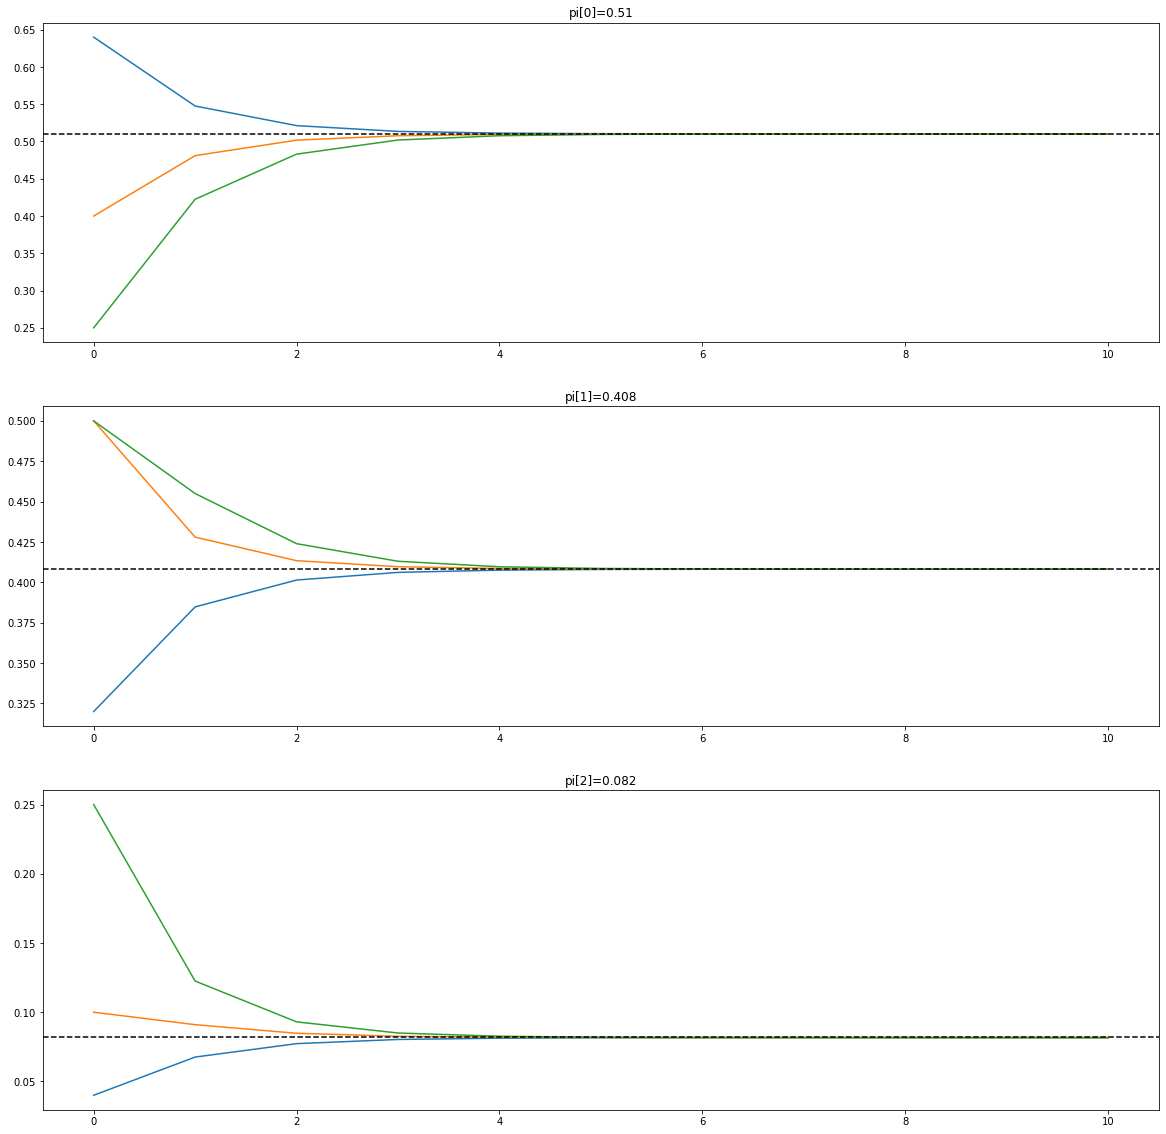

In [135]:
fig,a =  plt.subplots(P.shape[1],figsize=(20,20))
for j in range(len(data[1])):
    for i in range(len(data[0])):
        a[j].plot(range(N+1),data[j][i])
    a[j].set_title("pi[{}]={}".format(j,avg[j]))
    a[j].axhline(y=avg[j], color='k', linestyle='--')